In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import glob
import json
from matplotlib import pyplot as plt

files = sorted(glob.glob("assets/results/*.json"))

data = []
for file in files:
    with open(file, "r") as f:
        d = json.load(f)
        data.append(d)
        
def replace_ood_vals(df):
    return df.replace('0:1:2:3:4', 'A')\
.replace('5:6:7:8:9', 'B')\
.replace('0:1', 'A')\
.replace('2:3', 'B')\
.replace('1:4', 'A')\
.replace('0:2:3', 'B')\
.replace('0', 'A')\
.replace('1', 'B')\
.replace("", "Full")

df = replace_ood_vals(pd.json_normalize(data, max_level=1)).set_index(["model_name", "dataset_name", "ood"]).sort_index().reset_index()
df.to_csv("assets/results/summary.csv", index=False)
df_flat = df.melt(id_vars=["dataset_name", "model_name", "ood"], var_name="metric").dropna()

In [3]:
classifiers = ["resnet50_vicreg_ce", "resnet_ce_mse", "resnet_edl_mse", "z_resnet_ce_mse", "z_resnet_edl_mse"]
autoencoders = ["resnet_ce_mse", "resnet_edl_mse", "z_resnet_ce_mse", "z_resnet_edl_mse", "flow_ss_vcr_mse"]
flows = ["flow_ss_vcr_mse"]
fpis = ["z_resnet_ce_mse", "z_resnet_edl_mse"]
df_classifiers = df_flat[df_flat.model_name.isin(classifiers)]
df_autoencoders = df_flat[df_flat.model_name.isin(autoencoders)]
df_flows = df_flat[df_flat.model_name.isin(flows)]
df_fpis = df_flat[df_flat.model_name.isin(fpis)]

# Metrics computed
# [train,test,val]_acc - classifiers
# knn_[f,l]_[l2,ip].[kld,emd,auc] - classifiers
# rcn_[l2,ip].[kld,emd,auc] - autoencoders
# knn_[u,v]_[l2,ip].[kld,emd,auc] - flows
# knn_[f,l]_fp_[l2,ip].[kld,emd,auc] - fpis
# [emb,lgt]_[l2,ip].[kld,emd,auc] - fpis

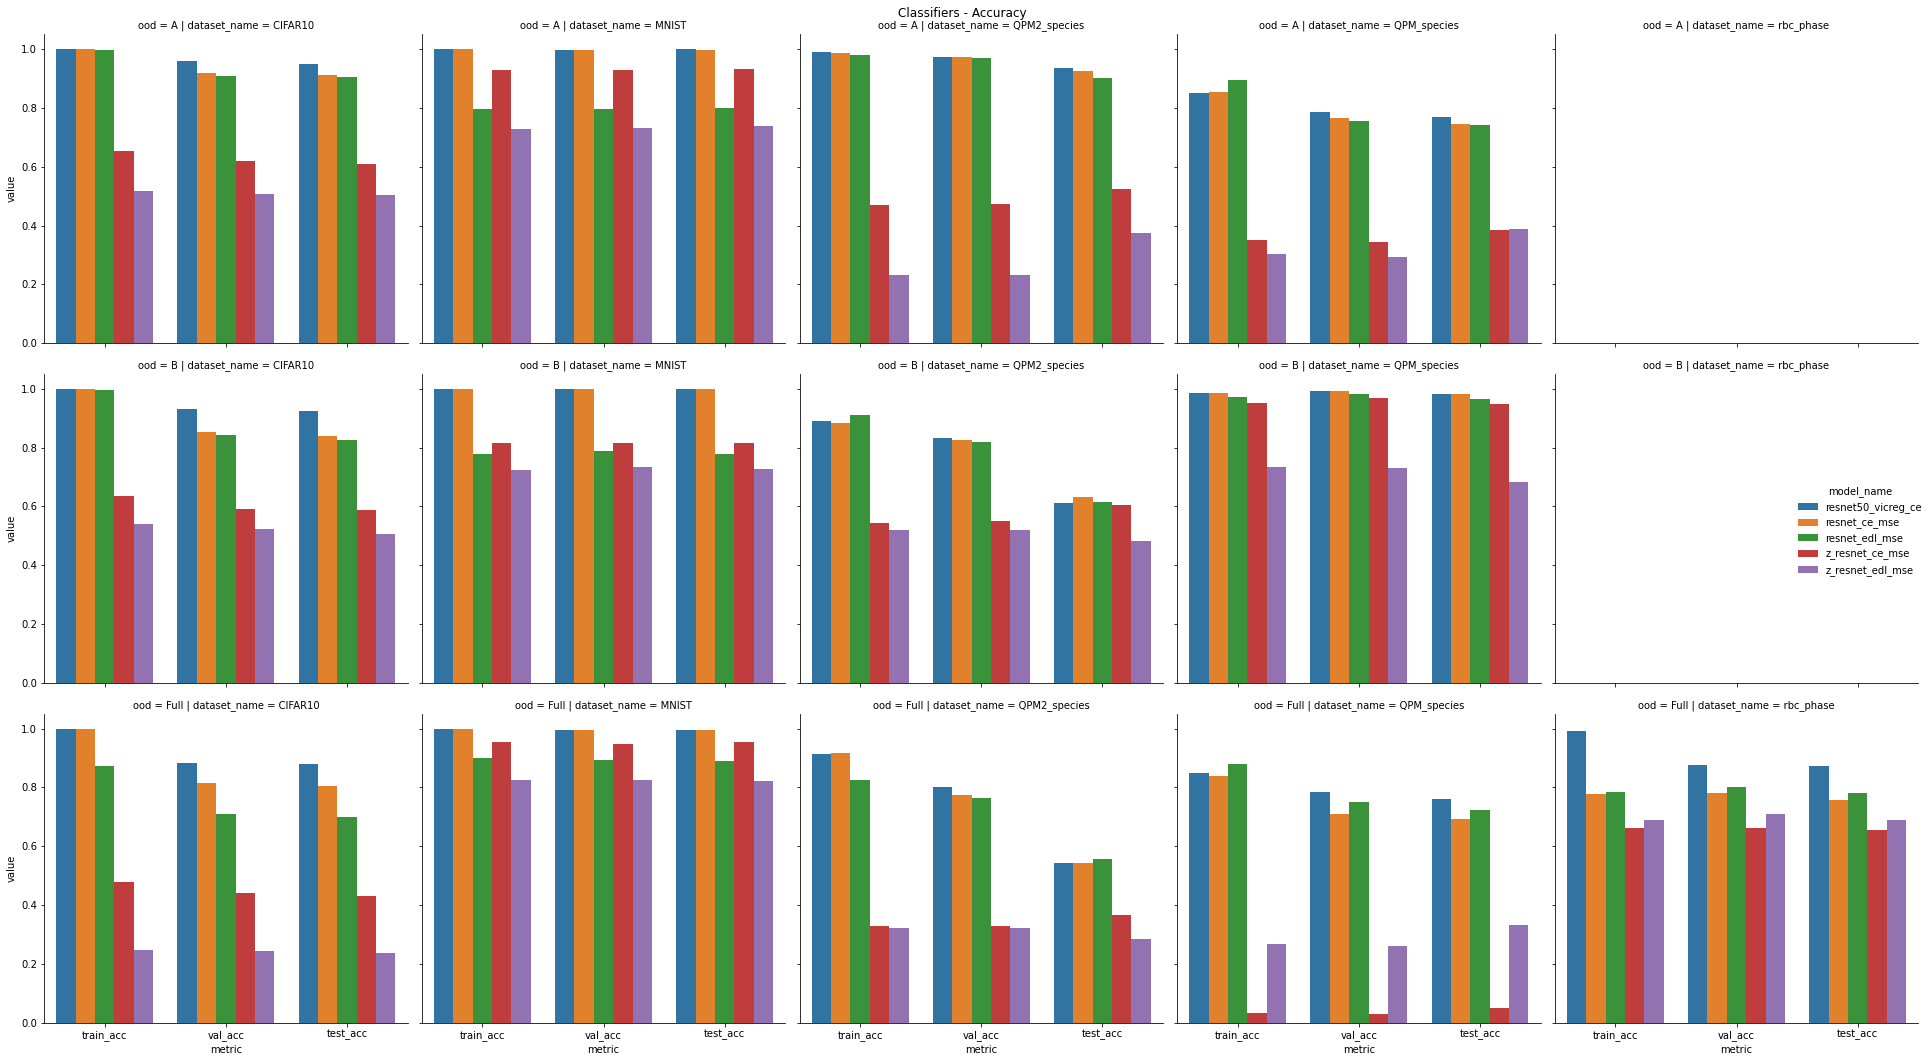

In [4]:
d = df_classifiers[df_classifiers.metric.str.fullmatch(r'(train|test|val)_acc')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Classifiers - Accuracy")
plt.tight_layout()
plt.show()

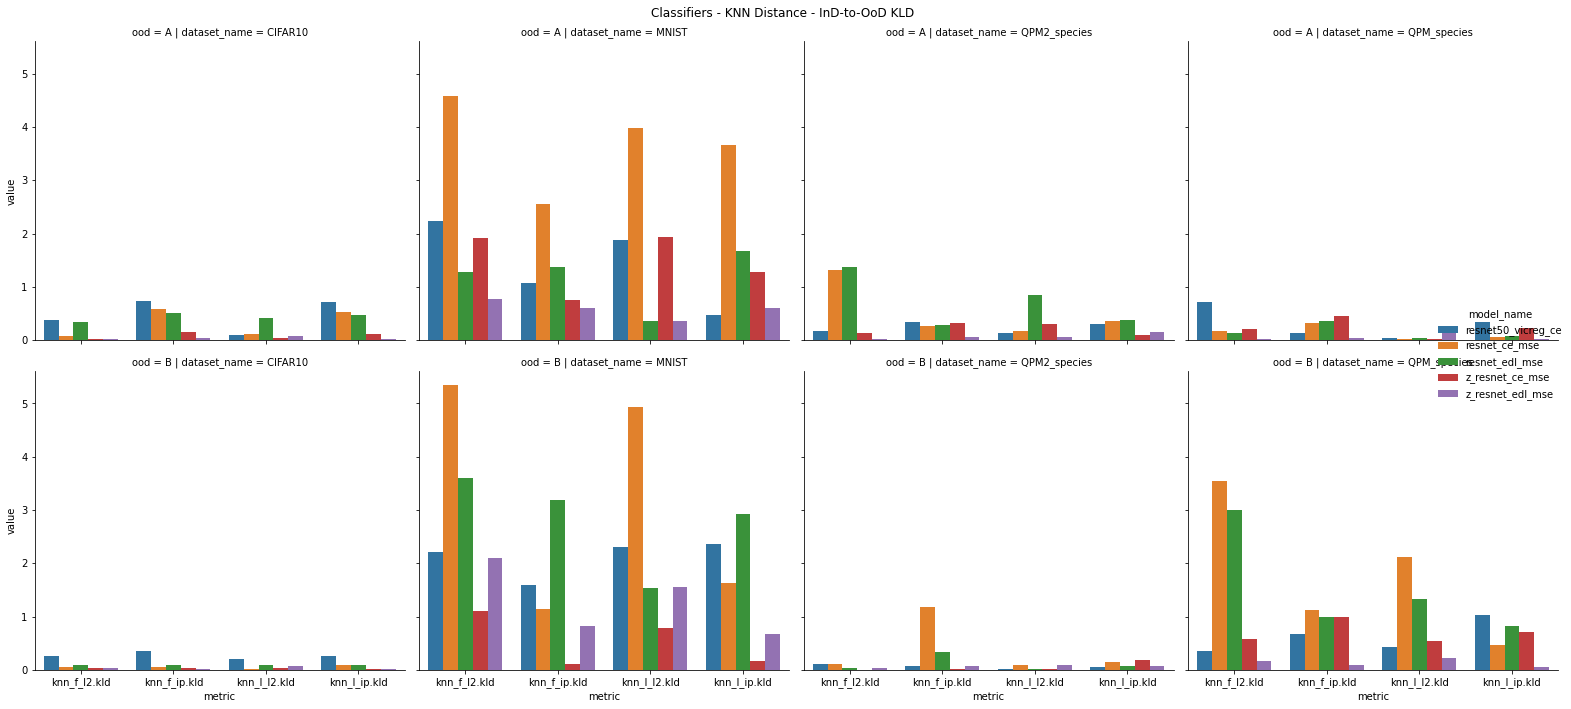

In [5]:
d = df_classifiers[df_classifiers.metric.str.fullmatch(r'knn_(f|l)_(l2|ip).kld')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Classifiers - KNN Distance - InD-to-OoD KLD")
plt.tight_layout()
plt.show()

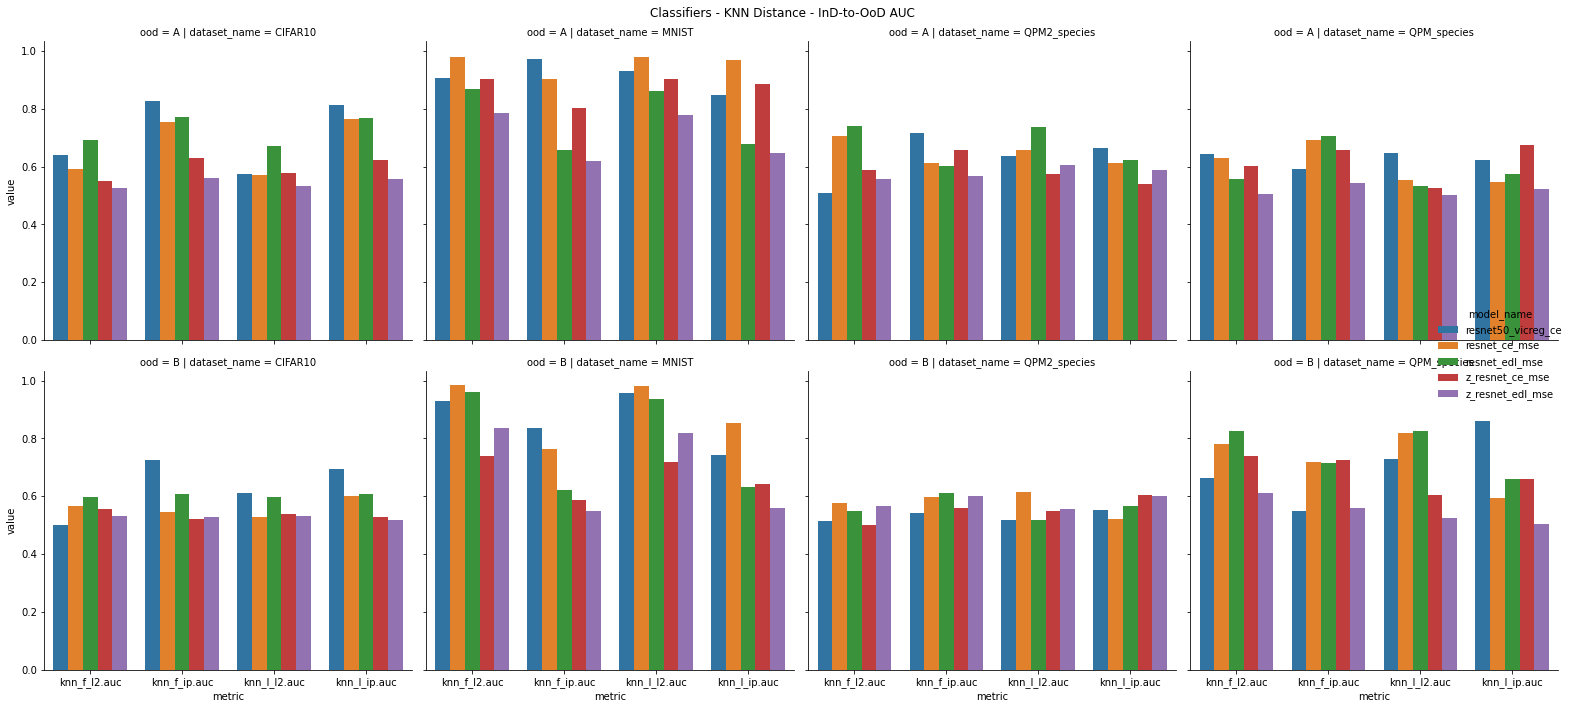

In [6]:
d = df_classifiers[df_classifiers.metric.str.fullmatch(r'knn_(f|l)_(l2|ip).auc')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Classifiers - KNN Distance - InD-to-OoD AUC")
plt.tight_layout()
plt.show()

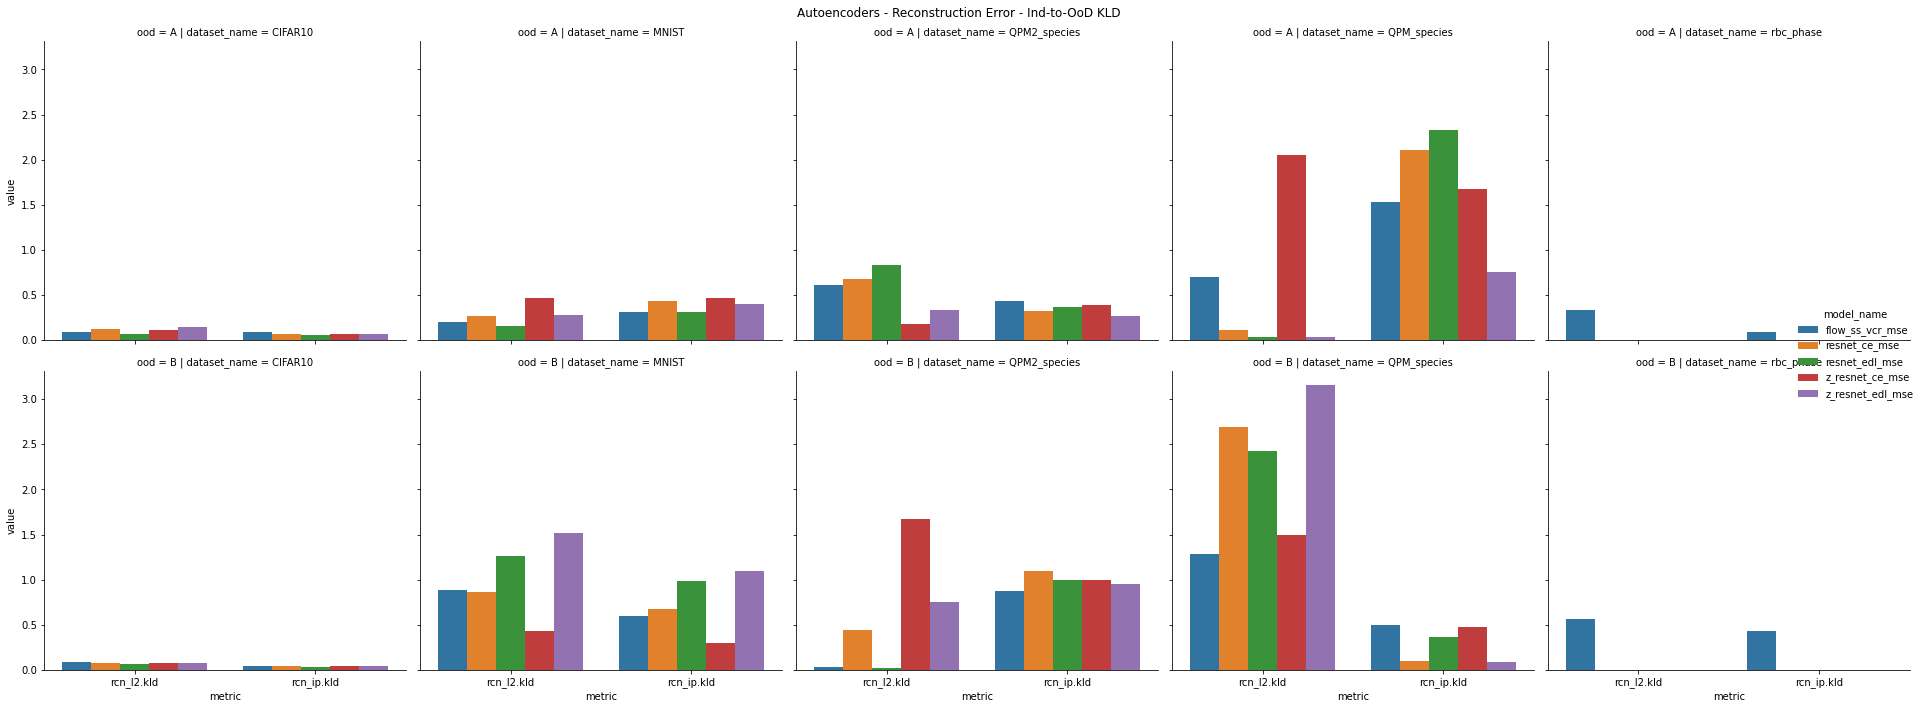

In [7]:
d = df_autoencoders[df_autoencoders.metric.str.fullmatch(r'rcn_(l2|ip).kld')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Autoencoders - Reconstruction Error - Ind-to-OoD KLD")
plt.tight_layout()
plt.show()

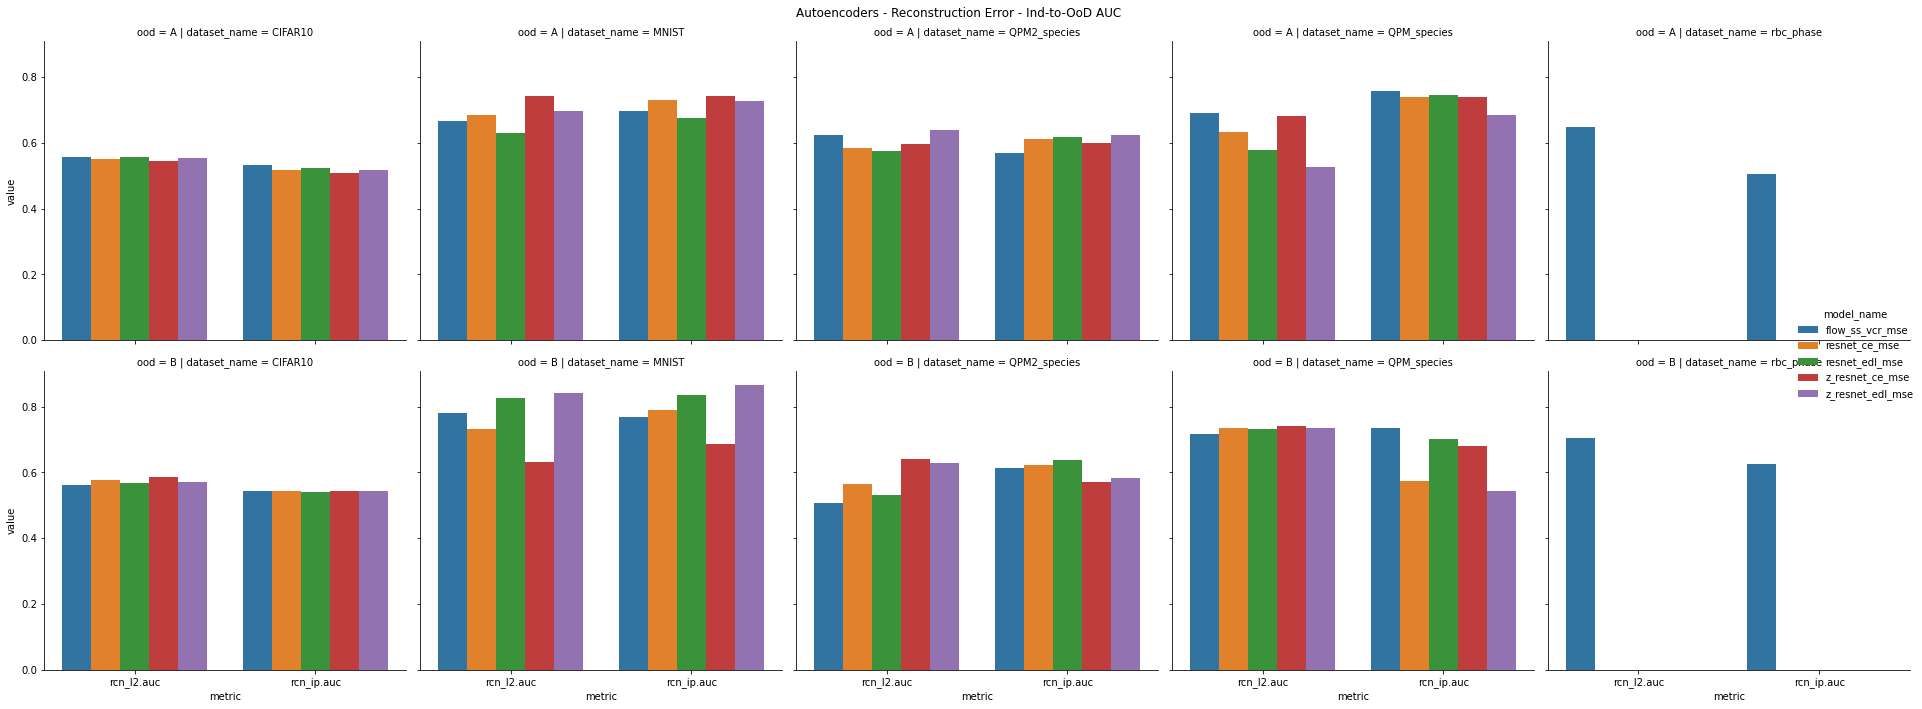

In [8]:
d = df_autoencoders[df_autoencoders.metric.str.fullmatch(r'rcn_(l2|ip).auc')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Autoencoders - Reconstruction Error - Ind-to-OoD AUC")
plt.tight_layout()
plt.show()

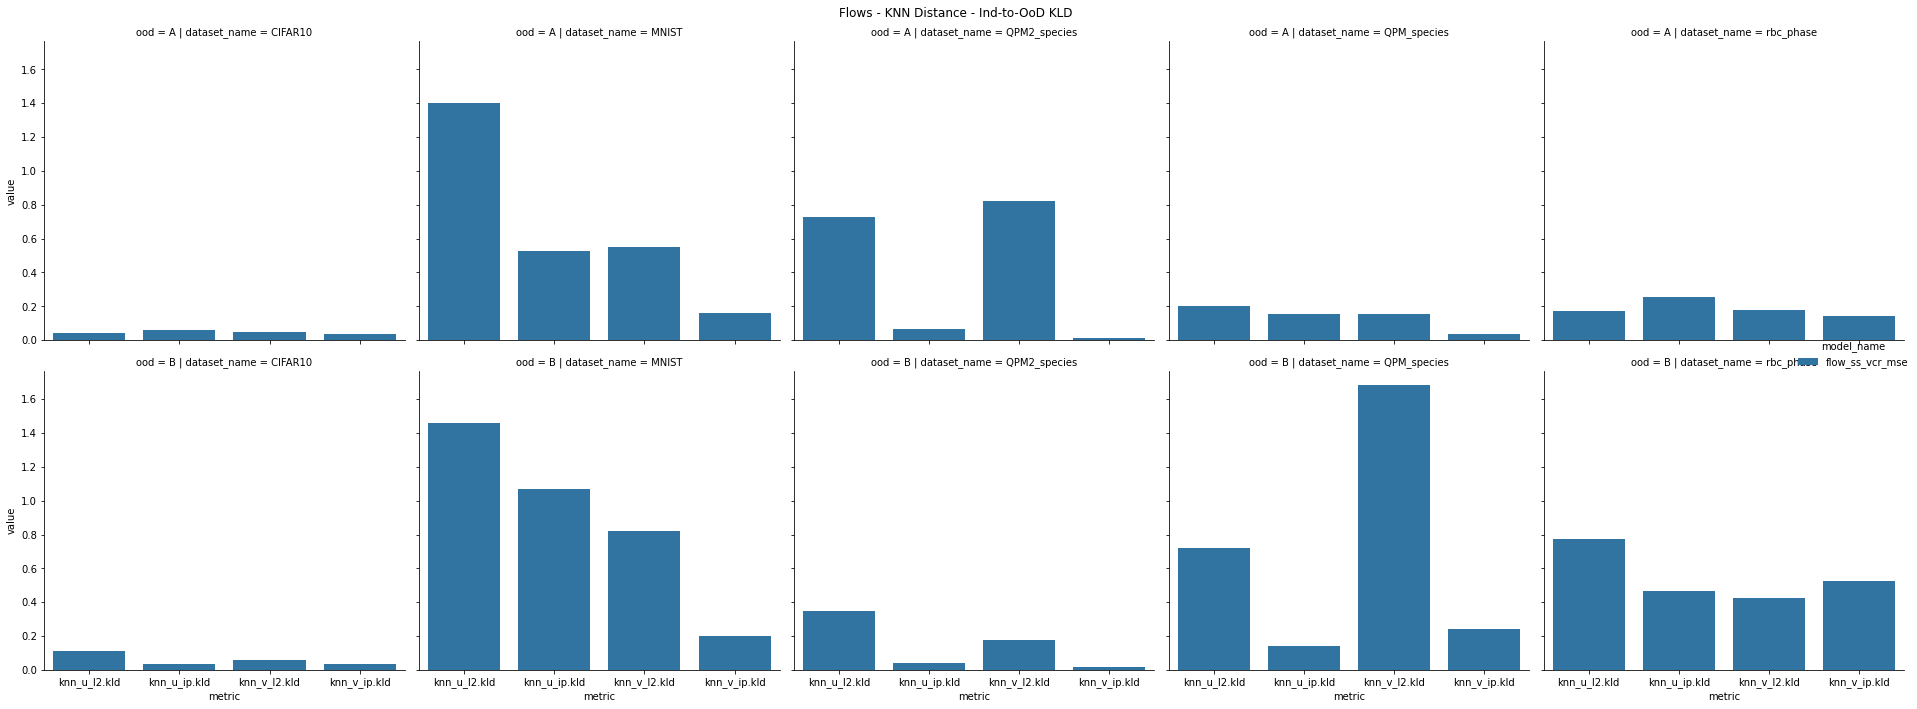

In [9]:
d = df_flows[df_flows.metric.str.fullmatch(r'knn_(u|v)_(l2|ip).kld')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Flows - KNN Distance - Ind-to-OoD KLD")
plt.tight_layout()
plt.show()

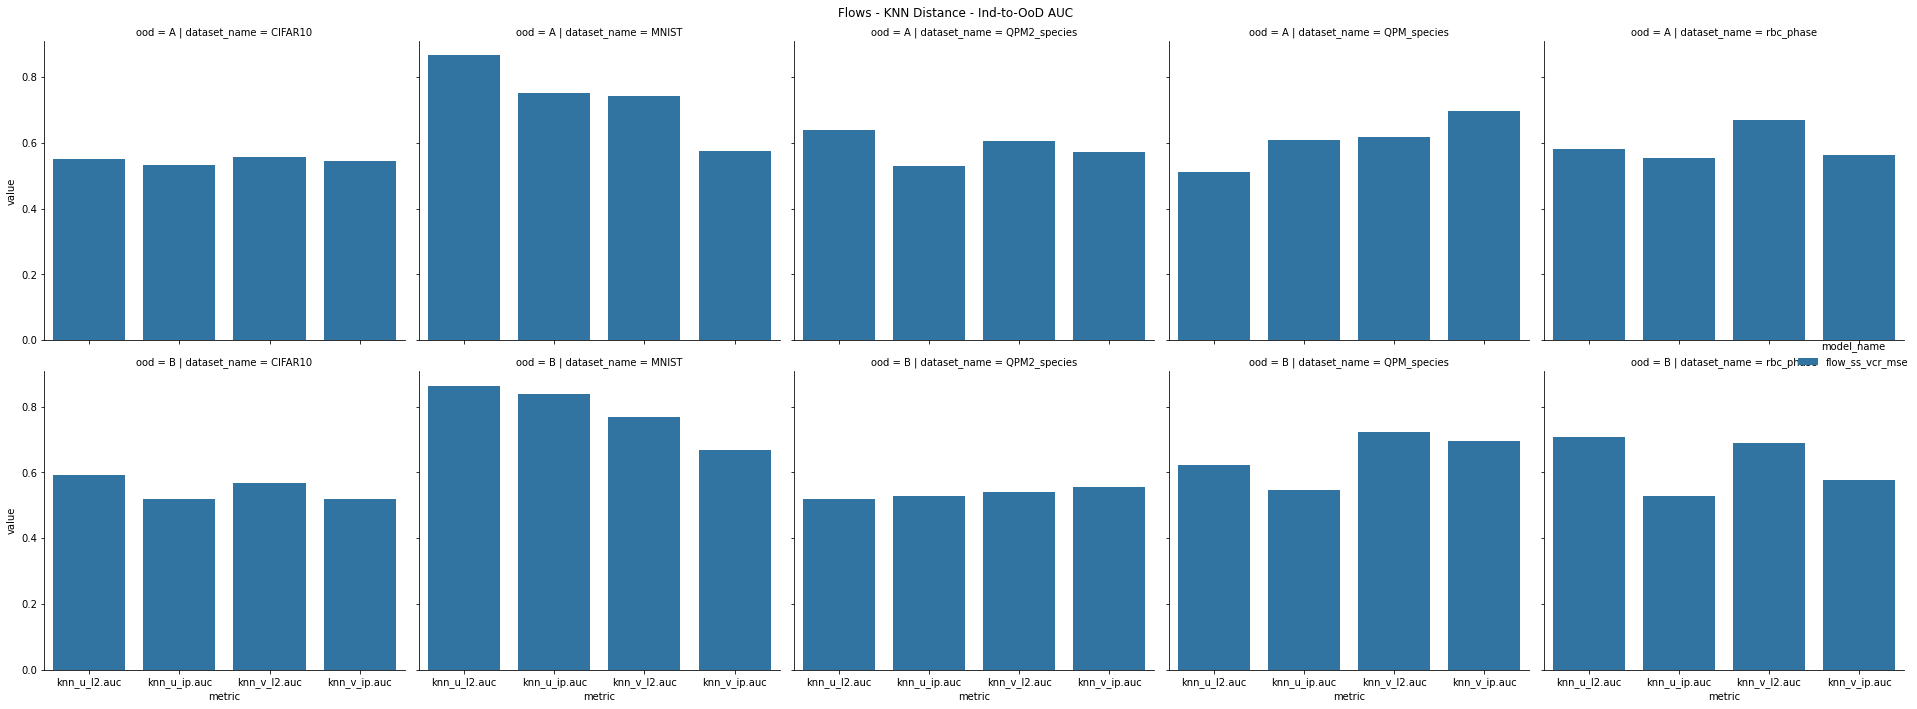

In [10]:
d = df_flows[df_flows.metric.str.fullmatch(r'knn_(u|v)_(l2|ip).auc')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Flows - KNN Distance - Ind-to-OoD AUC")
plt.tight_layout()
plt.show()

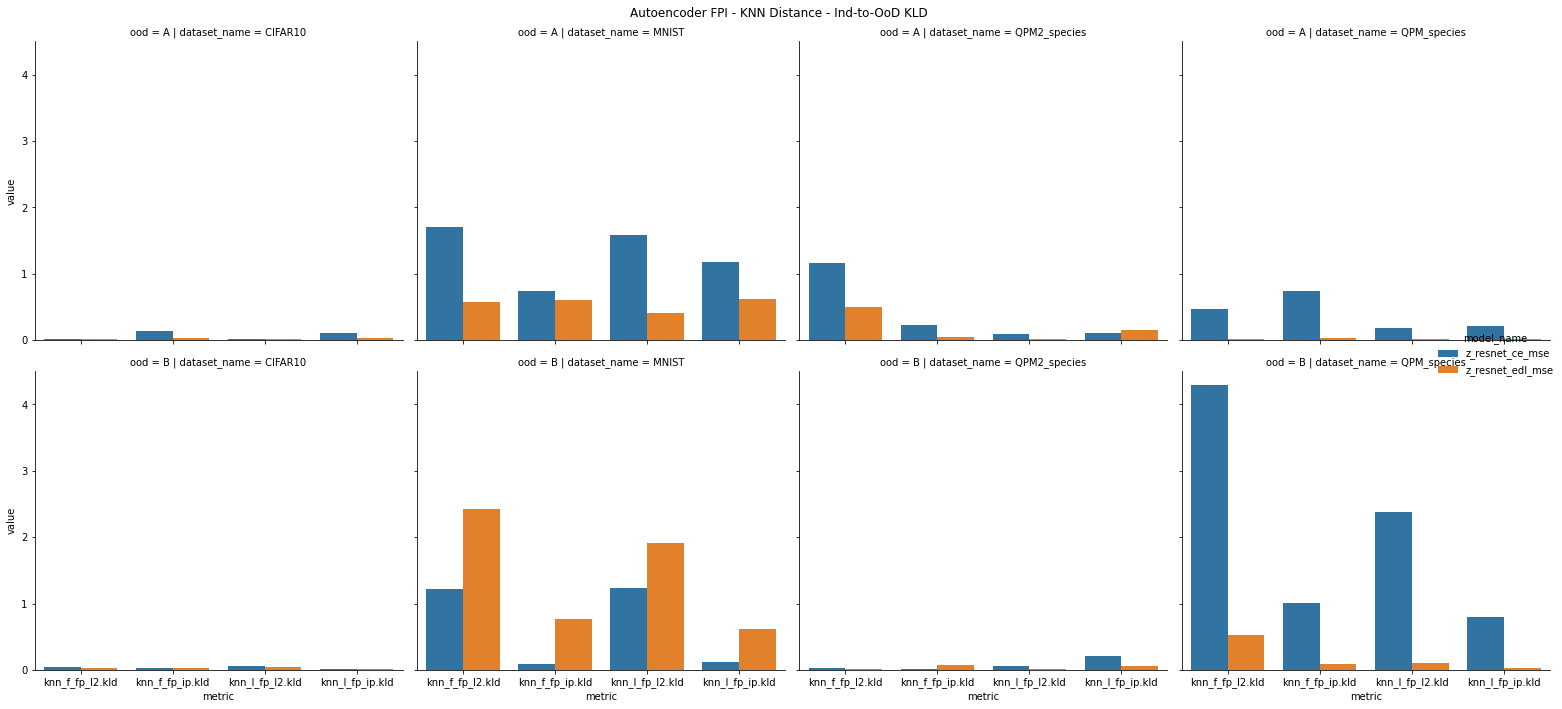

In [11]:
d = df_fpis[df_fpis.metric.str.fullmatch(r'knn_(f|l)_fp_(l2|ip).kld')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Autoencoder FPI - KNN Distance - Ind-to-OoD KLD")
plt.tight_layout()
plt.show()

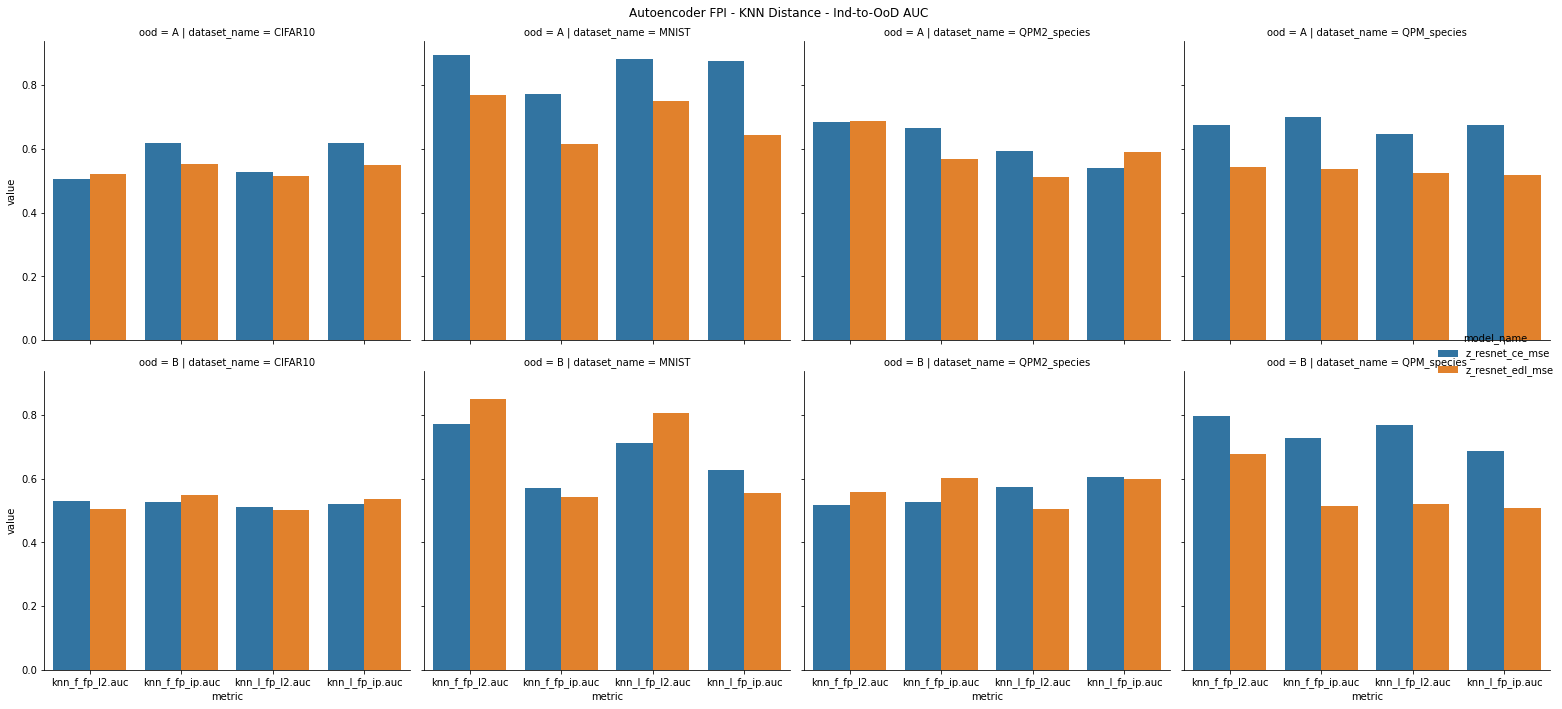

In [12]:
d = df_fpis[df_fpis.metric.str.fullmatch(r'knn_(f|l)_fp_(l2|ip).auc')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Autoencoder FPI - KNN Distance - Ind-to-OoD AUC")
plt.tight_layout()
plt.show()

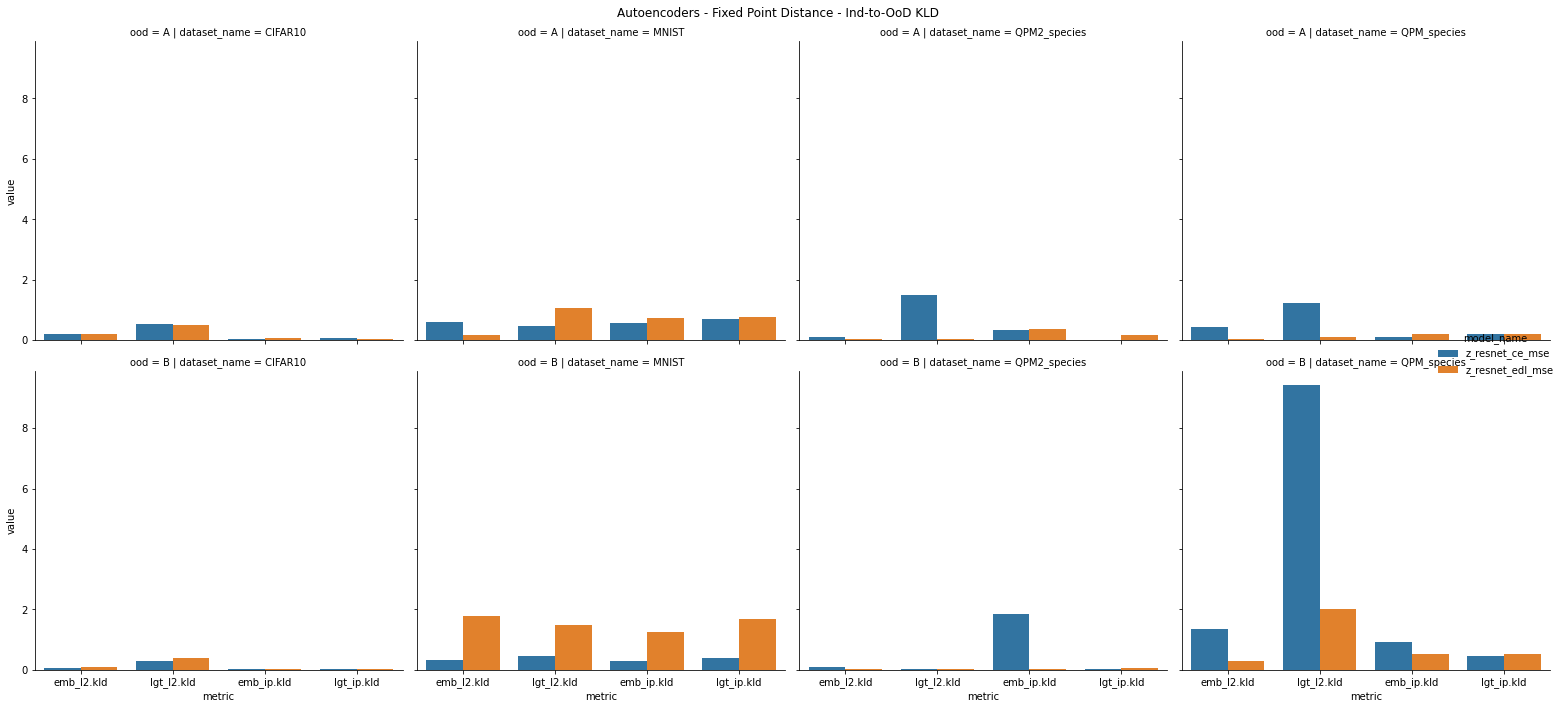

In [13]:
d = df_fpis[df_fpis.metric.str.fullmatch(r'(emb|lgt)_(l2|ip).kld')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Autoencoders - Fixed Point Distance - Ind-to-OoD KLD")
plt.tight_layout()
plt.show()

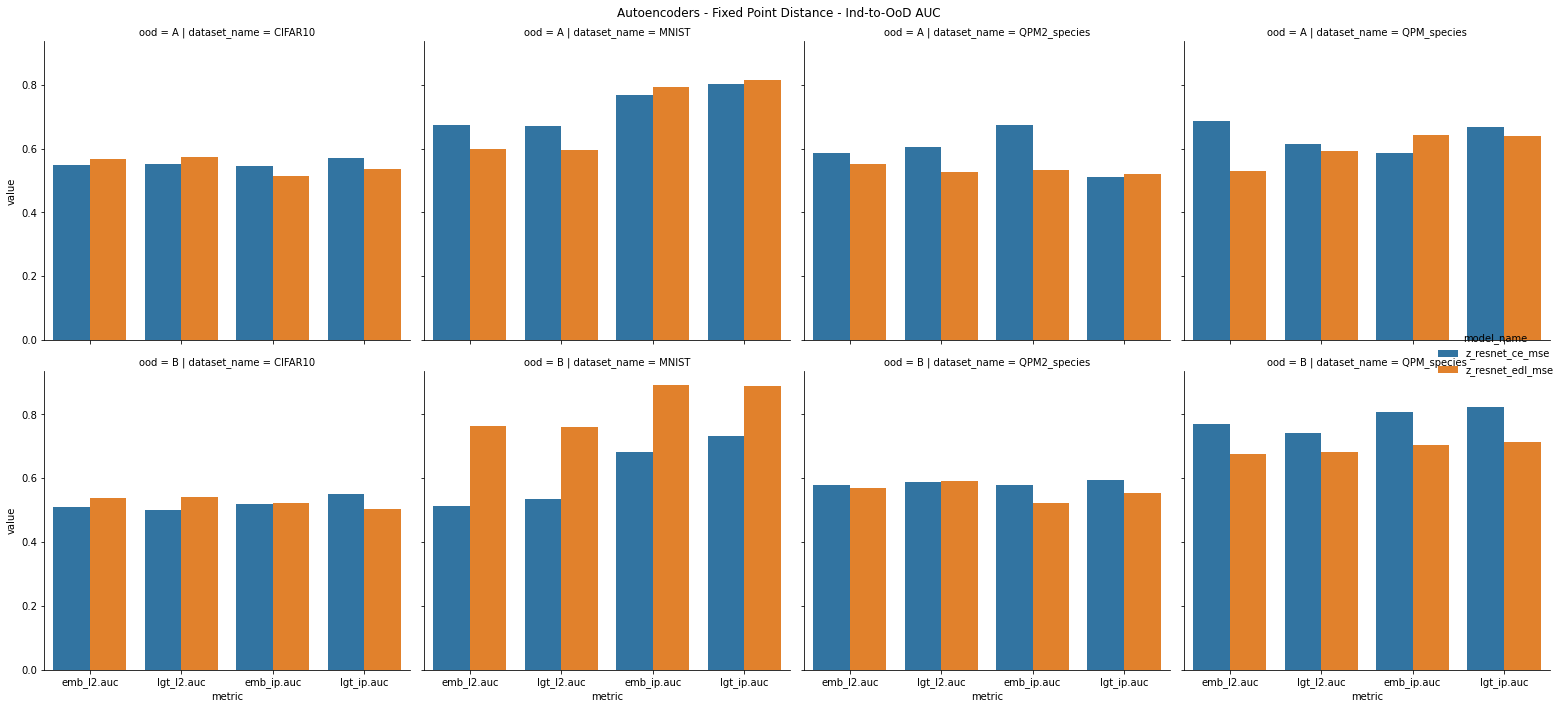

In [14]:
d = df_fpis[df_fpis.metric.str.fullmatch(r'(emb|lgt)_(l2|ip).auc')]
sns.catplot(data=d, x="metric", y="value", col="dataset_name", row="ood", hue="model_name", kind="bar")
plt.suptitle("Autoencoders - Fixed Point Distance - Ind-to-OoD AUC")
plt.tight_layout()
plt.show()